In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Milestone Actions of Day 4

In [2]:
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [3]:
data.shape

(450, 26)

In [4]:
data.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

Question 1

In [5]:
print('Number of different companies: '+str(len(set(data['Company Name']))-1))

Number of different companies: 438


Question 2

In [6]:
borough_group = data.groupby(['Borough']).sum()
borough_group

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
Borough,,,,,,,,,,,,,
Bronx,461091,6871.0,22.0,61.0,2630578.85,24356310.51,1714.567956,-3103.272930,8566.0,609.0,109651.0,80534929.0,7.918972e+10
Brooklyn,2074816,16197.0,25.0,501.0,4631586.48,46020868.83,6915.280478,-12575.005339,51922.0,6231.0,104760.0,535228654.0,5.052350e+11
New York,393558,9802.0,0.0,4.0,4769565.73,42418706.18,1467.403411,-2663.316290,3793.0,152.0,215287.0,37531993.0,3.636988e+10
Queens,1938615,21384.0,102.0,3599.0,4446529.20,42741264.59,6233.255480,-11307.433445,61761.0,3991.0,299261.0,627454710.0,6.075466e+11
Staten Island,92776,1133.0,0.0,0.0,1268741.77,35019884.90,324.910537,-593.403718,4013.0,397.0,109115.0,40903284.0,4.018147e+10


In [7]:
print('Jobs created in Queens: '+str(borough_group.loc['Queens','Job created']))

Jobs created in Queens: 102.0


Question 3

In [8]:
print('Number if unique email domains: '+str(len(set(data['company email']))-1))

Number if unique email domains: 420


Question 4

In [9]:
import collections

In [10]:
data['Company Name'].isnull().sum()

0

Company Name does not contain NaN and number of unique company names is less than the number of entries therefore some Company Names are repeated


Will need to be careful about counting the number of businesses per NTA

In [11]:
NTA_Company = data[['NTA','Company Name']]

In [12]:
NTA_dict = collections.defaultdict(list)
for i,j in NTA_Company.to_records(index=False):
    NTA_dict[i].append(j)

In [13]:
NTA_count = {key:len(set(value)) for key, value in NTA_dict.items()}
NTA_count = pd.DataFrame(NTA_count.items(), columns=['NTA','Number of Companies']).sort_values(by='Number of Companies', ascending=False)
NTA_count

,NTA,Number of Companies
4,Hunters Point-Sunnyside-West Maspeth,72
3,Sunset Park West,48
13,NaN,39
27,park-cemetery-etc-Brooklyn,15
21,Queensbridge-Ravenswood-Long Island City,15
...,...,...
52,Washington Heights South,1
12,Forest Hills,1
55,Morrisania-Melrose,1
34,Borough Park,1


In [14]:
n_businesses = NTA_count.loc[NTA_count['Number of Companies'].gt(4)]
n_businesses = [i for i in n_businesses['NTA'] if str(i).lower()!='nan']

In [15]:
ans = data.groupby(['NTA']).mean().loc[n_businesses][['Job created','Total Savings']]

In [16]:
ans

,Job created,Total Savings
NTA,,
Hunters Point-Sunnyside-West Maspeth,NaN,23931.398933
Sunset Park West,NaN,14316.976875
park-cemetery-etc-Brooklyn,NaN,14327.419333
Queensbridge-Ravenswood-Long Island City,NaN,61830.770625
Greenpoint,NaN,9753.649286
Mott Haven-Port Morris,3.333333,17843.937857
Hunts Point,12.000000,39246.016154
East Williamsburg,NaN,13990.626364
Carroll Gardens-Columbia Street-Red Hook,NaN,24337.390000


In [17]:
ans.to_csv('JobCreated_TotalSavings_NTA.csv')

## Milestone Actions of Day 5

In [18]:
from scipy import stats

In [19]:
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

Question 2 part 1

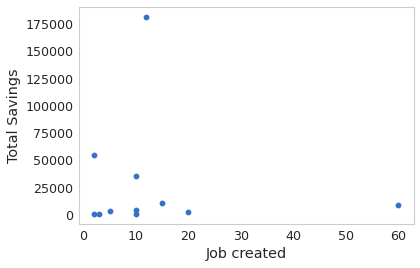

In [20]:
plt.scatter(data['Job created'], data['Total Savings'])

plt.xlabel('Job created')
plt.ylabel('Total Savings')
plt.grid(False)

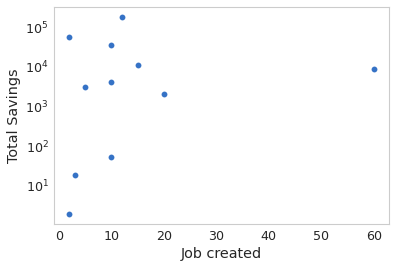

In [21]:
plt.scatter(data['Job created'], data['Total Savings'])

plt.yscale('log')
plt.xlabel('Job created')
plt.ylabel('Total Savings')
plt.grid(False)

Question 2 part 2

In [22]:
def binScalars(y, x, x0, x1, dx):
    bins = np.round(np.arange(x0, x1, dx), 2)
    my_dict = {}
    for i in bins:
        my_dict[str(i)] = []
    
    for i in range(len(y)):
        if x[i] < x0 or x[i] > x1:
            continue
        else:
            my_ind = int((x[i]-x0)/dx)

            my_dict[str(np.round(x0+my_ind*dx,2))] += [y[i]]

    binned_dat = np.zeros([len(bins),4])
    binned_dat[:,0] = bins+dx/2
    for i in range(len(bins)):
        binned_dat[i,1] = np.average(my_dict[str(bins[i])])
        binned_dat[i,2] = stats.sem(my_dict[str(bins[i])])
        binned_dat[i,3] = np.std(my_dict[str(bins[i])])

    return binned_dat

In [23]:
data['Job created'][np.isfinite(data['Job created'])]

29     10.0
37     60.0
95      5.0
120    12.0
137    10.0
324     2.0
353     2.0
414    15.0
432     3.0
433    20.0
445    10.0
Name: Job created, dtype: float64

In [24]:
x = np.array(data['Job created'][np.isfinite(data['Job created'])])
y = np.array(data['Total Savings'][np.isfinite(data['Job created'])])
binned_savings = binScalars(y, x, 0, 65, 5)

/home/andy/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/andy/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andy/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/andy/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andy/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)


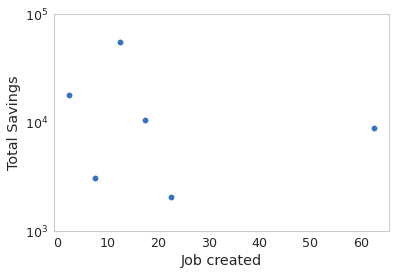

In [25]:
plt.scatter(binned_savings[:,0], binned_savings[:,1])

plt.ylim([1000,100000])
plt.yscale('log')
plt.xlabel('Job created')
plt.ylabel('Total Savings')
plt.grid(False)

Question 2 part 3

In [26]:
data.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [27]:
data_month = data
data_month['Month'] = [i[:2] for i in data['Effective Date']]

In [28]:
month_mean = data_month.groupby(['Month']).mean()
month_sum = data_month.groupby(['Month']).sum()

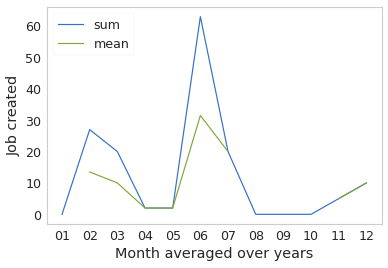

In [29]:
plt.plot(month_sum.index, month_sum['Job created'], color='C0', label='sum')
plt.plot(month_mean.index, month_mean['Job created'], color='C1', label='mean')

plt.grid(False)
plt.xlabel('Month averaged over years')
plt.ylabel('Job created')
plt.legend(loc=2)